### Chebyshev filter design

In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-2]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:

import numpy as np
from sclibrary import dataset_loader
from sclibrary import SCPlot

sc, coordinates = dataset_loader.load_paper_data()

# create a plot
scplot = SCPlot(sc, coordinates)

In [3]:
f0 = np.array([-0.0689, -0.1378, 0.2067, -0.0689, 0.3445, -0.5512, 0.5512, 0.3675, 0.1837, -0.1837])
f = np.array([0.0323, 0.4980, 2.3825, 0.8799, -0.5297, -0.5192, 1.0754, 0.4732, -1.1667, 0.0922])

In [4]:
from sclibrary.filters import ChebyshevFilterDesign

filter = ChebyshevFilterDesign(simplicial_complex=sc)
comp_coeffs = sc.get_component_coefficients(component="gradient")
filter.get_ideal_frequency(p_choice="L1L", component_coeffs=comp_coeffs)

array([[ 0.60122049, -0.09175091,  0.1396666 ,  0.04971285, -0.1724554 ,
        -0.06212096,  0.05246051,  0.26026553,  0.32422689,  0.01203544],
       [-0.09175091,  0.88597122,  0.05068546, -0.08851963, -0.17895288,
        -0.10988727, -0.1314653 ,  0.12388823, -0.06604651,  0.03332187],
       [ 0.1396666 ,  0.05068546,  0.46844458,  0.23457636,  0.16529914,
        -0.06934434, -0.35488607, -0.00550633,  0.08774241, -0.07808196],
       [ 0.04971285, -0.08851963,  0.23457636,  0.60445178, -0.08077692,
        -0.29704436,  0.06535224, -0.07922808, -0.19814458, -0.1708424 ],
       [-0.1724554 , -0.17895288,  0.16529914, -0.08077692,  0.66170782,
        -0.0244529 , -0.15842494,  0.22670306, -0.13731286,  0.17969796],
       [-0.06212096, -0.10988727, -0.06934434, -0.29704436, -0.0244529 ,
         0.48178135, -0.14907409,  0.02661841,  0.06246219, -0.33653941],
       [ 0.05246051, -0.1314653 , -0.35488607,  0.06535224, -0.15842494,
        -0.14907409,  0.47855006,  0.15949072

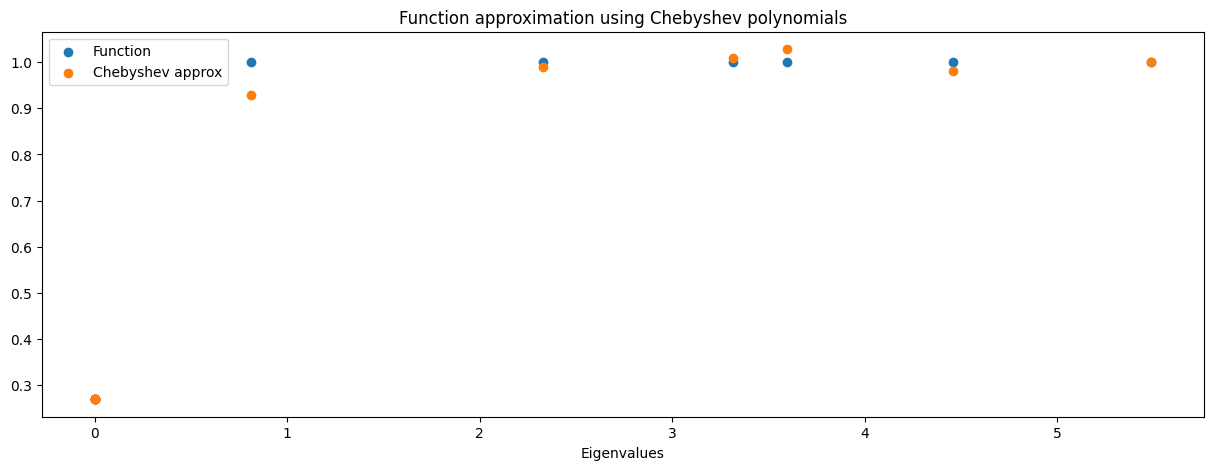

In [5]:
filter.plot_chebyshev_series_approx(p_choice="L1L")

In [6]:
# apply filter
filter.apply(f=f, p_choice="L1L", component="gradient", L=200, cut_off_frequency=0.1)

Calculating Chebyshev filter approximation for k = 1...
Calculating Chebyshev filter approximation for k = 2...
Calculating Chebyshev filter approximation for k = 3...
Calculating Chebyshev filter approximation for k = 4...
Calculating Chebyshev filter approximation for k = 5...
Calculating Chebyshev filter approximation for k = 6...
Calculating Chebyshev filter approximation for k = 7...
Calculating Chebyshev filter approximation for k = 8...
Calculating Chebyshev filter approximation for k = 9...
Calculating Chebyshev filter approximation for k = 10...
Calculating Chebyshev filter approximation for k = 11...
Calculating Chebyshev filter approximation for k = 12...
Calculating Chebyshev filter approximation for k = 13...
Calculating Chebyshev filter approximation for k = 14...
Calculating Chebyshev filter approximation for k = 15...
Calculating Chebyshev filter approximation for k = 16...
Calculating Chebyshev filter approximation for k = 17...
Calculating Chebyshev filter approximati

Text(0.5, 1.0, 'Error per filter size')

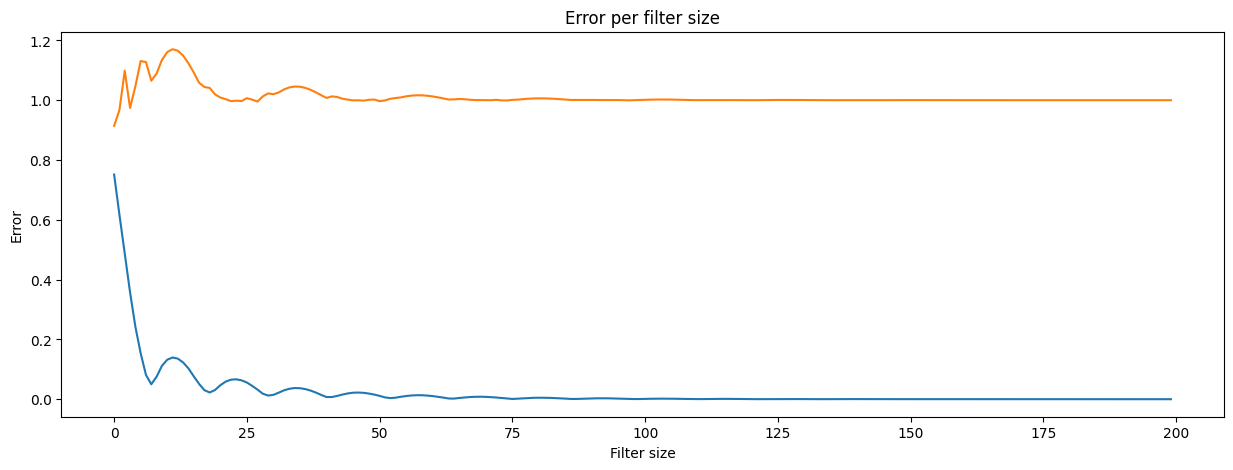

In [27]:
import matplotlib.pyplot as plt

extracted_comp_error = filter.history["extracted_component_error"]
filter_error = filter.history["filter_error"]

# plot the error
plt.figure(figsize=(15, 5))
plt.plot(extracted_comp_error)
plt.plot(filter_error)
plt.xlabel("Filter size")
plt.ylabel("Error")
plt.title("Error per filter size")

In [28]:
filter.history["frequency_responses"][-1]

array([-4.53975746e-05, -1.00005080e+00, -4.53978687e-05,  9.99898969e-01,
        4.53991581e-05,  1.00000246e+00,  9.99982447e-01, -4.53974333e-05,
       -9.99979020e-01,  9.99989197e-01])

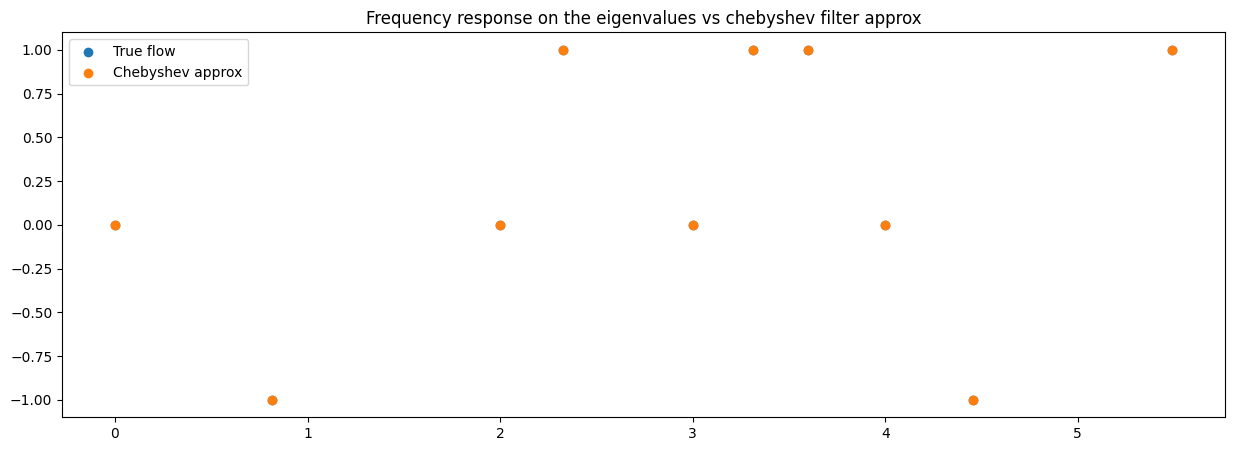

In [29]:
filter.plot_frequency_response_approx(flow=f, component="gradient")

In [30]:
error = filter.history["extracted_component_error"][-1]
print(f"Error: {error}")

Error: 3.748439199117467e-05
